In [1]:
#import essential packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
!pip install pingouin
import pingouin as pg
import statsmodels.formula.api as smf

%matplotlib inline

plt.style.use('ggplot')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 36.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=d7a1fc34b224c9a37bf133aaf21f0fa3a0984e6e34403ebbf86343da857516fe
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=5939f34c97bbf04eec4a9d7f8b47a2bdffc7cc0a51d5a88e29d4be2da278cf8e
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
#import the data set 
df_whole = pd.read_excel("/content/data_cohort1_V2.xlsx")
df_Pre = df_whole[df_whole['Post']==0]
df_After = df_whole[df_whole['Post']==1]


## Course Project: Mobile App Efficacy 
J. Dittenber, M.S.

##Executive Summary 

The experiment took place over two periods. The before the app period and the after the app period. The experiment captured the spending and booking behavior of those who adopted the app as well as those who did not adopt the app in both periods. 

Spending and booking decreased for *all* users from the before the app period to the after the adoption period. 






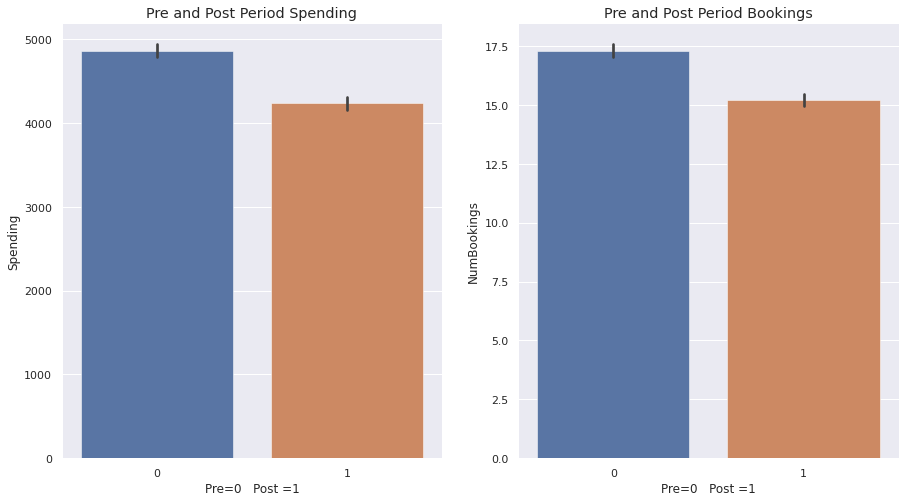

In [ ]:
fig, ax=plt.subplots(1,2)
p= sns.barplot(data=df_whole, x='Post', y = 'Spending', ax=ax[0])
p.set_title('Pre and Post Period Spending')
p.set(xlabel= 'Pre=0   Post =1')

p= sns.barplot(data=df_whole, x='Post', y = 'NumBookings', ax=ax[1])
p.set_title('Pre and Post Period Bookings')
p.set(xlabel= 'Pre=0   Post =1')


sns.set({'figure.figsize':(15,8)})

The analysis indicates that adopting the app accounted for 31% of the decrease in spending from the pre and post periods. On average, *users who adopted the spent $816 less than those who did not adopt the app*. 



During the analysis it was noted that customers who have more tenure with Smith Hotels exhibit a reliable increase in spending and booking for every month of tenure they accumulate. 

Addtionally, it was noted that increases in loyalty membership increase spending.




Text(0.5, 1.0, 'Tenure v. Bookings')

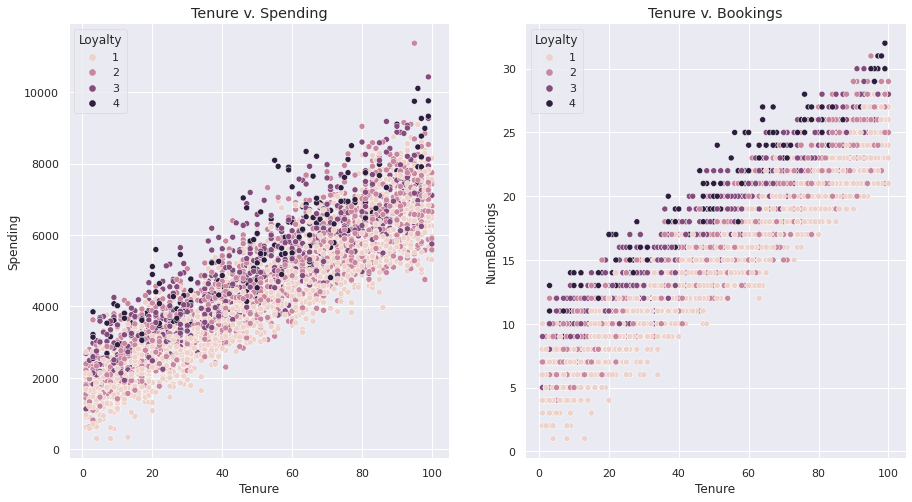

In [ ]:
fig, ax=plt.subplots(1,2)

p=sns.scatterplot(data=df_whole, x="Tenure", y="Spending", hue = "Loyalty", ax=ax[0])
p.set_title('Tenure v. Spending')


p=sns.scatterplot(data=df_whole, x="Tenure", y="NumBookings", hue = "Loyalty", ax=ax[1])
p.set_title('Tenure v. Bookings')


Therefore, if the company can afford the short term loss, an analysis on the app's impact on customer tenure and on customer loyalty should be conducted. If the app can reliably increase customer tenure and increase customer loyalty, then this will translate reliaby into more spending over time. 


A secondary suggested strategy is to first conduct a survey to get feedback regarding the user experience after the initial experiment. Second is to conduct an experiment of the app targeted to customers who are female, non-US citizens, in the basic membership, under the age of 40 and who are between 0-10 months of tenure. This could allow Smith Hotel to assess the apps impact on tenure and loyalty without affecting the demographic segment that historically spends the most money. In other words, if the app truly has an adverse affect on spending, tenure or loyalty, the costs will be minimized by selecting this demographic. 
*****************************************************************************
The three questions posed, and subsequent answers are as follows: 

*Question 1. Will the app lead to increased spending on the part of the customers? *
Answer: According to the intitial analysis the was responsible for a decrease in spending. 

*Question 2. HOw much of an increase in spending do you excpect? *
Answer: Initially the app cause a decrease of $816 for users who adopted the app.

Question 3: Do you expect the app's effect on spending to vary by customers' characteristics? 
Answer: During the analysis, it was discovered that the app did not increase the spending of customers based on categories. 

# Data Importation and Preprocessing

In [ ]:
#import the data set 
df_whole = pd.read_excel("/content/data_cohort1_V2 (1).xlsx")
df_Pre = df_whole[df_whole['Post']==0]
df_After = df_whole[df_whole['Post']==1]

Text(0.5, 1.0, 'Heat Map of Null Values')

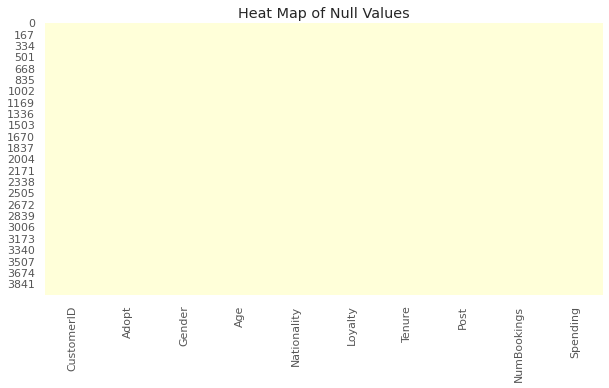

In [ ]:
#Create a heatmap to check for null values 
plt.figure(figsize=(10,5))
p=sns.heatmap(df_whole.isnull(), cbar=False, cmap="YlGnBu")
p.set_title('Heat Map of Null Values')

In [ ]:
#Check for null values by column 
df_whole.isnull().sum()

CustomerID     0
Adopt          0
Gender         0
Age            0
Nationality    0
Loyalty        0
Tenure         0
Post           0
NumBookings    0
Spending       0
dtype: int64

In [ ]:
#Find the total number of null values in the dataset 
df_whole.isnull().sum().sum()

0

In [ ]:
#Examine the column titles and layout 
df_whole.head()

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,0,18,5760
1,1002,1,Female,36,1,2,5,0,6,1830
2,1003,1,Female,43,1,1,12,0,9,2682
3,1004,1,Male,47,1,1,70,0,21,6846
4,1005,1,Male,41,1,2,13,0,11,3377


In [ ]:
#Check that the datatypes are correct 
df_whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   4000 non-null   int64 
 1   Adopt        4000 non-null   int64 
 2   Gender       4000 non-null   object
 3   Age          4000 non-null   int64 
 4   Nationality  4000 non-null   int64 
 5   Loyalty      4000 non-null   int64 
 6   Tenure       4000 non-null   int64 
 7   Post         4000 non-null   int64 
 8   NumBookings  4000 non-null   int64 
 9   Spending     4000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 312.6+ KB


# Univariate EDA 

We examine the univariate data on several levels. First, we will examine the data set as a whole. Second, we will examine the dataset by the Pre and Post period given that some statistics will not be the same for both groups. 

In [ ]:
#Review the data set as a whole
df_whole.describe()

,CustomerID,Adopt,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1000.500000,0.500000,45.364000,0.794000,1.77300,50.943000,0.500000,16.246250,4547.248250
std,577.422379,0.500063,9.956771,0.404481,0.88015,28.596926,0.500063,6.115469,1781.267612
min,1.000000,0.000000,18.000000,0.000000,1.00000,1.000000,0.000000,1.000000,297.000000
25%,500.750000,0.000000,39.000000,1.000000,1.00000,26.000000,0.000000,11.000000,3168.000000
50%,1000.500000,0.500000,45.000000,1.000000,2.00000,51.000000,0.500000,16.000000,4518.000000
75%,1500.250000,1.000000,52.000000,1.000000,2.00000,75.000000,1.000000,21.000000,5880.000000
max,2000.000000,1.000000,79.000000,1.000000,4.00000,100.000000,1.000000,32.000000,11377.000000


In [ ]:
#Review the Before the App data 
df_Pre.describe() 

,CustomerID,Adopt,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.0,2000.000000,2000.000000
mean,1000.500000,0.500000,45.364000,0.794000,1.77300,50.943000,0.0,17.300000,4862.323500
std,577.494589,0.500125,9.958016,0.404532,0.88026,28.600503,0.0,6.025791,1801.456295
min,1.000000,0.000000,18.000000,0.000000,1.00000,1.000000,0.0,4.000000,896.000000
25%,500.750000,0.000000,39.000000,1.000000,1.00000,26.000000,0.0,12.000000,3443.750000
50%,1000.500000,0.500000,45.000000,1.000000,2.00000,51.000000,0.0,17.000000,4822.000000
75%,1500.250000,1.000000,52.000000,1.000000,2.00000,75.000000,0.0,22.000000,6196.250000
max,2000.000000,1.000000,79.000000,1.000000,4.00000,100.000000,0.0,32.000000,11377.000000


In [ ]:
#Review the After the App data 
df_After.describe()


,CustomerID,Adopt,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.0,2000.000000,2000.000000
mean,1000.500000,0.500000,45.364000,0.794000,1.77300,50.943000,1.0,15.192500,4232.173000
std,577.494589,0.500125,9.958016,0.404532,0.88026,28.600503,0.0,6.023669,1703.973864
min,1.000000,0.000000,18.000000,0.000000,1.00000,1.000000,1.0,1.000000,297.000000
25%,500.750000,0.000000,39.000000,1.000000,1.00000,26.000000,1.0,10.000000,2880.000000
50%,1000.500000,0.500000,45.000000,1.000000,2.00000,51.000000,1.0,15.000000,4268.500000
75%,1500.250000,1.000000,52.000000,1.000000,2.00000,75.000000,1.0,20.000000,5520.500000
max,2000.000000,1.000000,79.000000,1.000000,4.00000,100.000000,1.0,31.000000,9330.000000


##Descriptives for Gender 

In [ ]:
#Determine count of Gender levels. 
occur = df_Pre.groupby(['Gender']).size()
print(f'The gender distribution is as follows \n {occur}')

The gender distribution is as follows 
 Gender
Female     762
Male      1238
dtype: int64


Text(0.5, 1.0, 'Count of Gender')

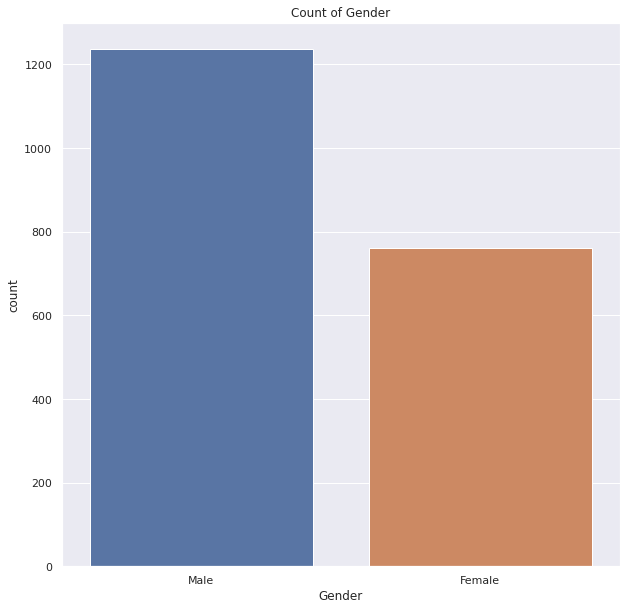

In [ ]:
#Create barplot 
plt.figure(figsize=(10, 10))
ax = sns.countplot(x='Gender',data=df_Pre)
ax.set_title("Count of Gender")

## Descriptives for Age 

The ages remain constant for both periods, therefore we can simply select before the app observations to determine descripitves for the customers' ages.

In [ ]:
#Calculate the mean Age of 2000 customers
mean_Age = round(df_Pre['Age'].mean(),1)
print(f'The mean age is {mean_Age}')

The mean age is 45.4


Text(0.5, 1.0, 'Distirbution of Age')

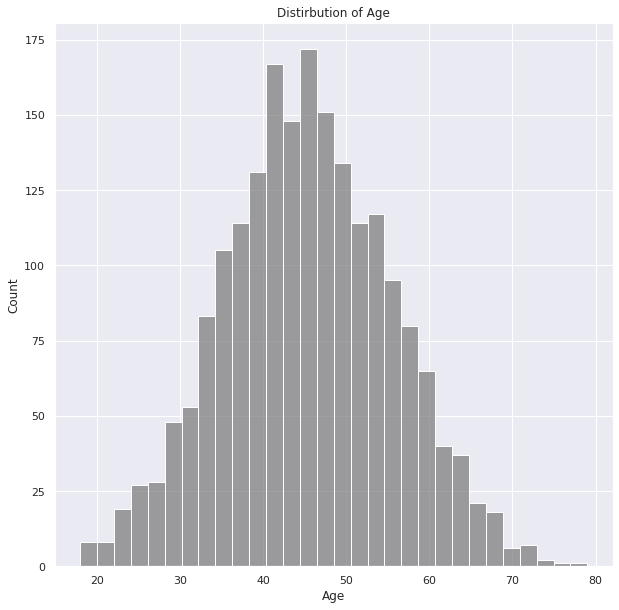

In [ ]:
#Create the histogram 
plt.figure(figsize=(10, 10))
ax = sns.histplot(data=df_Pre, x='Age', color = 'gray')
ax.set_title("Distirbution of Age")


In [ ]:
#Check the five number summary - the mean is very close to the median - good 
Age_summary = df_Pre['Age'].describe()
print(f'The summary statistics for the age is \n {Age_summary}')


The summary statistics for the age is 
 count    2000.000000
mean       45.364000
std         9.958016
min        18.000000
25%        39.000000
50%        45.000000
75%        52.000000
max        79.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Distribution of Age')

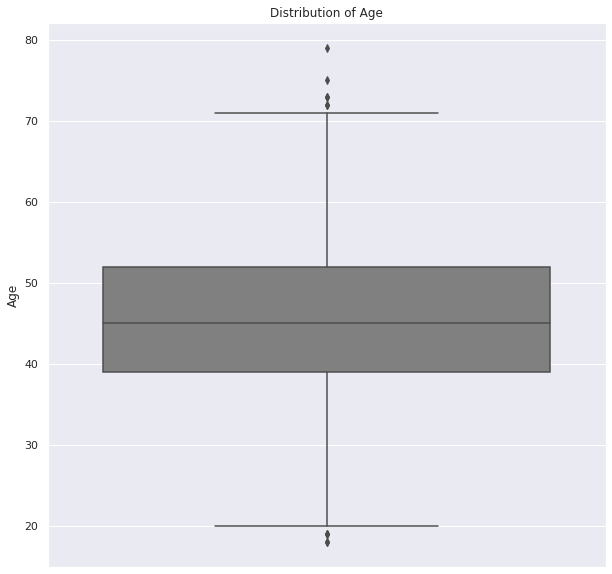

In [ ]:
#Check for outliers 
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=df_Pre,  y="Age", color='grey')
ax.set_title('Distribution of Age')

##Descriptives for Nationality 

# Nationality remains constant over both periods so we can examine before the app data. 

In [ ]:
#Separate the column by level and count 
occur = df_Pre.groupby(['Nationality']).size()
print(f'The distribution of non-U.S. citizens (0) vs. U.S. citizens (1) is as follows {occur}')

The distribution of non-U.S. citizens (0) vs. U.S. citizens (1) is as follows Nationality
0     412
1    1588
dtype: int64


Text(0.5, 1.0, 'Count of Nationality: Non-US Citizen=0, US Citizen=1')

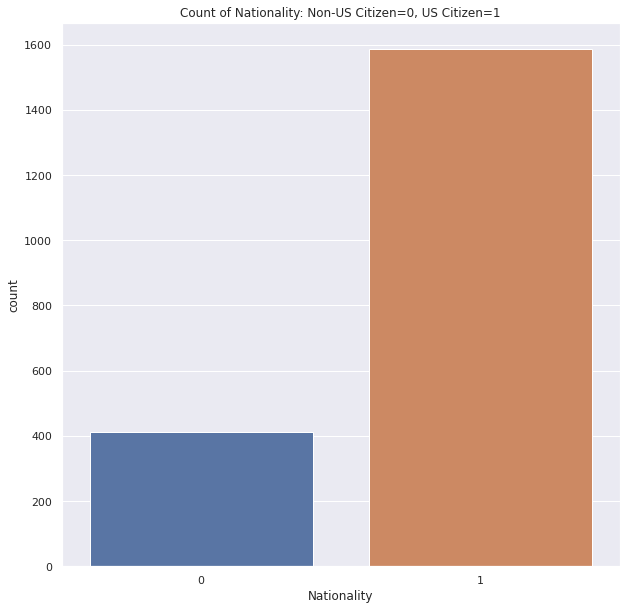

In [ ]:
#Generate the barplot 
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_Pre, x="Nationality")
ax.set_title("Count of Nationality: Non-US Citizen=0, US Citizen=1")


##Descriptives for Loyalty Membership and Tenure 

##Loyalty 
The largest membership is the Basic membership followed by Silver, Gold and Platinum, respectively. 

Loyalty remains constant during both periods. We can examine is using before the app data. 

In [ ]:
#Count the different values in the column
occur = df_Pre.groupby(['Loyalty']).size()
print(f'The distribution of the levels of loyalty (1-4) is as follows:\n {occur}')

The distribution of the levels of loyalty (1-4) is as follows:
 Loyalty
1    954
2    645
3    302
4     99
dtype: int64


Text(0.5, 1.0, 'Count of Loyalty Membership: 1=Basic, 2=Silver, 3=Gold, 4=Platinum')

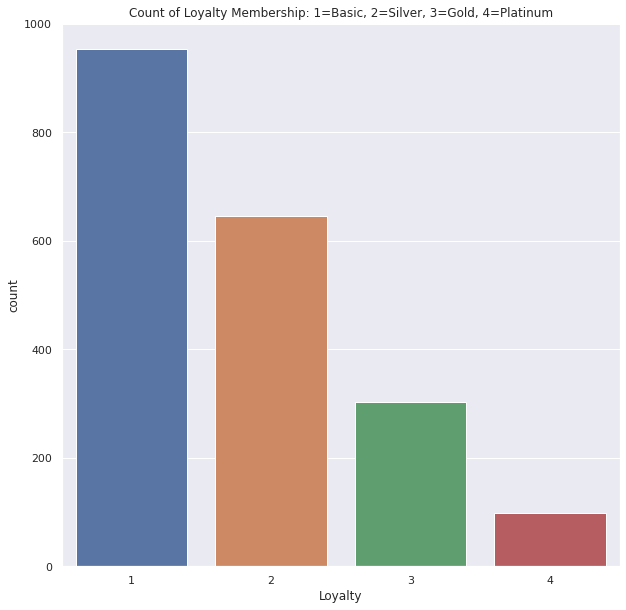

In [ ]:
#Create the bar plot 
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_Pre, x="Loyalty")
ax.set_title('Count of Loyalty Membership: 1=Basic, 2=Silver, 3=Gold, 4=Platinum')


##Tenure 

Tenure varies from one month to 100 months with a median of 51 months. 

The tenure observations remain constant during both periods. 

In [ ]:
#Check the descriptives for tenure 
Tenure_summary = df_Pre['Tenure'].describe()
print(f'The summary statistics for the tenure is \n {Tenure_summary}')

The summary statistics for the tenure is 
 count    2000.000000
mean       50.943000
std        28.600503
min         1.000000
25%        26.000000
50%        51.000000
75%        75.000000
max       100.000000
Name: Tenure, dtype: float64


Text(0.5, 1.0, 'Distribution of Tenure')

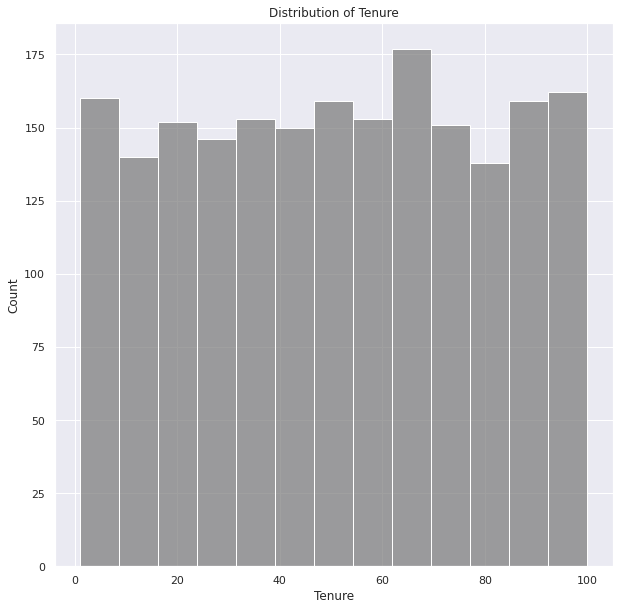

In [ ]:
#Create the histogram. Tenure apears nearly uniform. 
plt.figure(figsize=(10, 10))
ax = sns.histplot(data=df_Pre, x='Tenure', color = 'grey')
ax.set_title('Distribution of Tenure')
 

# Adopt v Non-Adopt






#There is an equal number of customers who adopted and did not adopt the app. 

In [ ]:
#Count the values in the column 
occur = df_Pre.groupby(['Adopt']).size()
print(f'The frequency of adopters of the app (1) versus those who did not adopt the app (0) is as follows:\n {occur}')

The frequency of adopters of the app (1) versus those who did not adopt the app (0) is as follows:
 Adopt
0    1000
1    1000
dtype: int64


Text(0.5, 1.0, 'Adopt v. Non-Adopt: Adopt = 1, Non-Adopt=0')

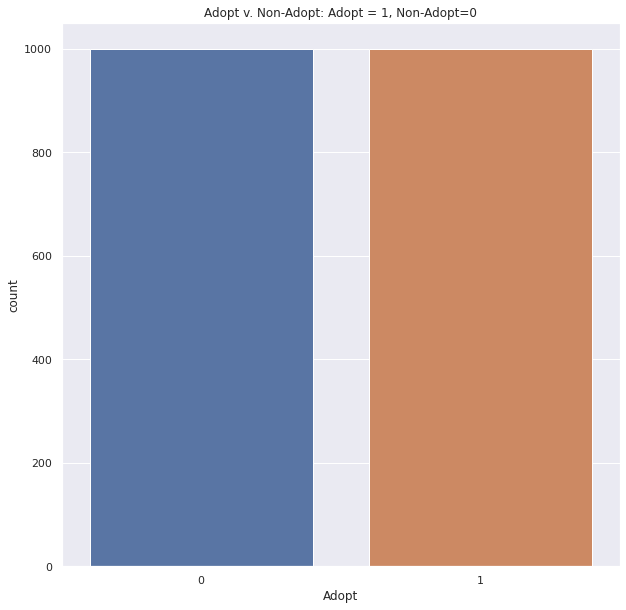

In [ ]:
#Generate the barplot 
plt.figure(figsize=(10, 10))
ax= sns.countplot(data=df_Pre, x="Adopt")
ax.set_title('Adopt v. Non-Adopt: Adopt = 1, Non-Adopt=0')

##Bivariate EDA

#*Given that spending and number of bookings do not remain constant across the before the app and after the app, we will examine these on three levels: The dataset as a whole, before the app, and after the app.*

## GENDER 

# *Both spending and booking decreased across Genders after the app was adopted.* 

# Spending and Booking for Gender for both periods combined

In [ ]:
#Get the dataset back and create just what is needed for the pivot table 
df_total_pivot = df_whole[['NumBookings', 'Spending', 'Gender', 'Nationality', 'Loyalty']]

In [ ]:
#Generate the pivot table 
dfTableWhole = df_total_pivot[['Gender', 'NumBookings', 'Spending']]
table = pd.pivot_table(data=dfTableWhole,index=['Gender'])
table

,NumBookings,Spending
Gender,,
Female,15.972441,4461.074147
Male,16.414782,4600.289176


#Spending and Booking for Gender for the before the app period 

In [ ]:
#Create the dataframe for before the app period 
df1 = df_Pre[['NumBookings', 'Spending', 'Gender', 'Nationality', 'Loyalty']]

In [ ]:
#Generate the pivot table 
df2 = df1[['Gender', 'NumBookings', 'Spending']]
table_ = pd.pivot_table(data=df2,index=['Gender'])
table_

,NumBookings,Spending
Gender,,
Female,16.997375,4765.326772
Male,17.486268,4922.025848


# Spending and Booking for Gender for the after the app period

In [ ]:
#Create the dataframe for after the app period 
dfAft = df_After[['NumBookings', 'Spending', 'Gender', 'Nationality', 'Loyalty']]

In [ ]:
#Generate the pivot table 
df_Table_After = dfAft[['Gender', 'NumBookings', 'Spending']]
table1 = pd.pivot_table(data=df_Table_After,index=['Gender'])
table1

,NumBookings,Spending
Gender,,
Female,14.947507,4156.821522
Male,15.343296,4278.552504


##NATIONALITY 
The spending and bookings decreased after the app for both US and Non-US citizens. 

The Entire Data Set 

In [ ]:
#Check the dataset as whole 
df3 = df_total_pivot[['Nationality', 'NumBookings', 'Spending']]
table2 = pd.pivot_table(data=df3,index=['Nationality'])
table2

,NumBookings,Spending
Nationality,,
0,15.865291,4449.190534
1,16.345088,4572.688917


Before the App 

In [ ]:
df4 = df_Pre[['Nationality', 'NumBookings', 'Spending']]
table3 = pd.pivot_table(data=df4, index = ['Nationality'])
table3 

,NumBookings,Spending
Nationality,,
0,16.978155,4767.524272
1,17.383501,4886.918766


After the App 

In [ ]:
df5 = df_After[['Nationality', 'NumBookings', 'Spending']]
table4 = pd.pivot_table(data=df5, index=['Nationality'])
table4 

,NumBookings,Spending
Nationality,,
0,14.752427,4130.856796
1,15.306675,4258.459068


##LOYALTY 
Spending and booking decreased for all Loyalty groups after adopting the app

The entire data set 

In [ ]:
df6 = df_total_pivot[['Loyalty','NumBookings', 'Spending' ]]
table5 = pd.pivot_table(data=df6,index=['Loyalty'])
table5

,NumBookings,Spending
Loyalty,,
1,15.311845,4271.416667
2,16.448062,4621.402326
3,17.549669,4922.319536
4,19.959596,5577.979798


Before the app

In [ ]:
df7 = df_Pre[['Loyalty', 'NumBookings', 'Spending']]
table6 = pd.pivot_table(data=df7, index=['Loyalty'])
table6

,NumBookings,Spending
Loyalty,,
1,16.335430,4575.329140
2,17.553488,4947.831008
3,18.592715,5251.453642
4,21.000000,5883.767677


After the app

In [ ]:
df8 = df_After[['Loyalty', 'NumBookings', 'Spending']]
table7 = pd.pivot_table(data=df8, index = ['Loyalty'])
table7

,NumBookings,Spending
Loyalty,,
1,14.288260,3967.504193
2,15.342636,4294.973643
3,16.506623,4593.185430
4,18.919192,5272.191919


##Spending Behavior by Category

*Spending & Booking by Gender*

*Spending*

Average spending across the entire data set


In [ ]:
#Calculate the average spending for the entire data set 
Average_Male_Spending = round(df_whole[df_whole['Gender']=='Male']['Spending'].mean(),2)
Average_Female_Spending = round(df_whole[df_whole['Gender']=='Female']['Spending'].mean(),2)
print(f'The average spending of for males is ${Average_Male_Spending} and the average spending for females is ${Average_Female_Spending}')
print(f'One average males spend ${round(Average_Male_Spending - Average_Female_Spending,2)} more than females')

The average spending of for males is $4600.29 and the average spending for females is $4461.07
One average males spend $139.22 more than females


Average spending before the app 

In [ ]:
#Calculate the average spending for before the app
Average_Male_Spending = round(df_Pre[df_Pre['Gender']=='Male']['Spending'].mean(),2)
Average_Female_Spending = round(df_Pre[df_Pre['Gender']=='Female']['Spending'].mean(),2)
print(f'The average spending of for males is ${Average_Male_Spending} and the average spending for females is ${Average_Female_Spending}')
print(f'On average males spend ${round(Average_Male_Spending - Average_Female_Spending,2)} more than females')

The average spending of for males is $4922.03 and the average spending for females is $4765.33
On average males spend $156.7 more than females


Average spending after the app

In [ ]:
#Calculate the average spending for after the app 
Average_Male_Spending = round(df_After[df_After['Gender']=='Male']['Spending'].mean(),2)
Average_Female_Spending = round(df_After[df_After['Gender']=='Female']['Spending'].mean(),2)
print(f'The average spending of for males is ${Average_Male_Spending} and the average spending for females is ${Average_Female_Spending}')
print(f'One average males spend ${round(Average_Male_Spending - Average_Female_Spending,2)} more than females')

The average spending of for males is $4278.55 and the average spending for females is $4156.82
One average males spend $121.73 more than females


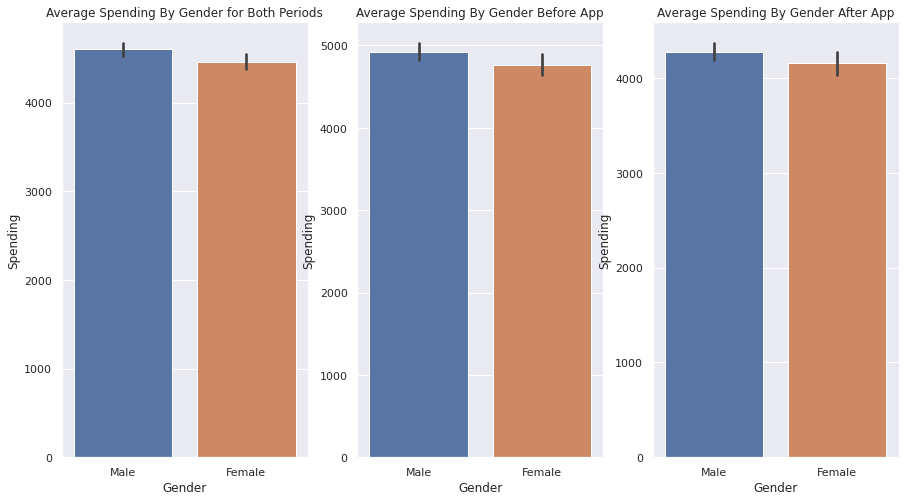

In [ ]:
#NOTE* You might have to run this cell on its own after running the file
#Don't now why the first run is always squashed. Run it on its own to get full size
#Generate a visualization 

fig, ax=plt.subplots(1,3)

p=sns.barplot(data=df_whole, x='Gender', y = 'Spending', ax=ax[0])
p.set_title('Average Spending By Gender for Both Periods')

p=sns.barplot(data=df_Pre, x='Gender', y = 'Spending', ax=ax[1])
p.set_title('Average Spending By Gender Before App')


p=sns.barplot(data=df_After, x='Gender', y = 'Spending', ax=ax[2])
p.set_title('Average Spending By Gender After App')

sns.set({'figure.figsize':(15,8)})

*Booking*

Average bookings across the entire data set

In [ ]:
#Calculate the mean bookings for the data set 
Average_Male_NumberBookings = round(df_whole[df_whole['Gender']=='Male']['NumBookings'].mean(),1)
Average_Female_NumberBookings = round(df_whole[df_whole['Gender']=='Female']['NumBookings'].mean(),1)
print(f'The average number of bookings for males is {Average_Male_NumberBookings} and the average number of booksings for females is {Average_Female_NumberBookings}')

The average number of bookings for males is 16.4 and the average number of booksings for females is 16.0


Average booking before the app 

In [ ]:
#Calculate the mean bookings before the app
Average_Male_NumberBookings = round(df_Pre[df_Pre['Gender']=='Male']['NumBookings'].mean(),1)
Average_Female_NumberBookings = round(df_Pre[df_Pre['Gender']=='Female']['NumBookings'].mean(),1)
print(f'The average number of before the app bookings for males is {Average_Male_NumberBookings} and the average number of booksings for females is {Average_Female_NumberBookings}')

The average number of before the app bookings for males is 17.5 and the average number of booksings for females is 17.0


Average booking after the app 

In [ ]:
#Calculated the mean bookings after the app 
Average_Male_NumberBookings = round(df_After[df_After['Gender']=='Male']['NumBookings'].mean(),1)
Average_Female_NumberBookings = round(df_After[df_After['Gender']=='Female']['NumBookings'].mean(),1)
print(f'The average number after the app bookings for males is {Average_Male_NumberBookings} and the average number of booksings for females is {Average_Female_NumberBookings}')

The average number after the app bookings for males is 15.3 and the average number of booksings for females is 14.9


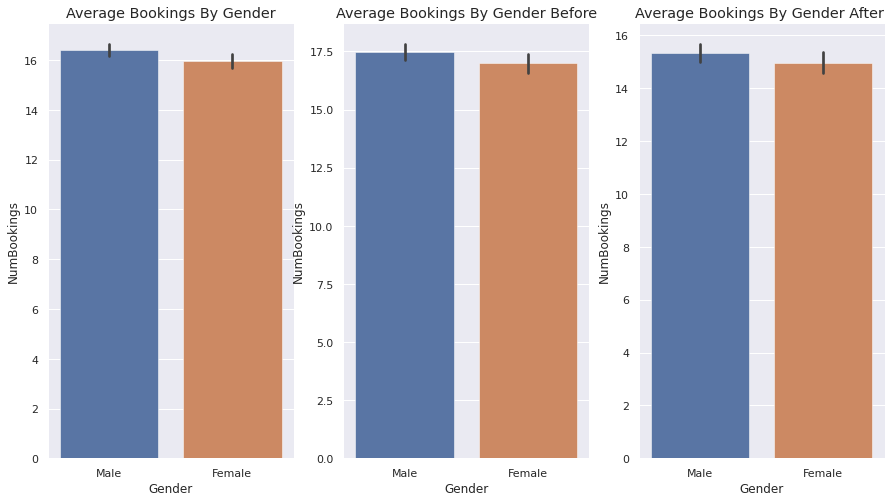

In [ ]:
#Generate a visualization 
fig, ax=plt.subplots(1,3)

p=sns.barplot(data=df_whole, x='Gender', y = 'NumBookings', ax=ax[0])
p.set_title('Average Bookings By Gender')

p=sns.barplot(data=df_Pre, x='Gender', y = 'NumBookings', ax=ax[1])
p.set_title('Average Bookings By Gender Before')


p=sns.barplot(data=df_After, x='Gender', y = 'NumBookings', ax=ax[2])
p.set_title('Average Bookings By Gender After ')

sns.set({'figure.figsize':(15,8)})

*Spending & Bookings by Age*

Based on the scatterplots, there appears to be a very weak positive correlation with age over spending and age over number of bookings. There appears to be no difference among the genders.

SPENDING 

Entire Datat Set 

Before the app 

Text(0.5, 1.0, 'Age v. Spending Before the APP')

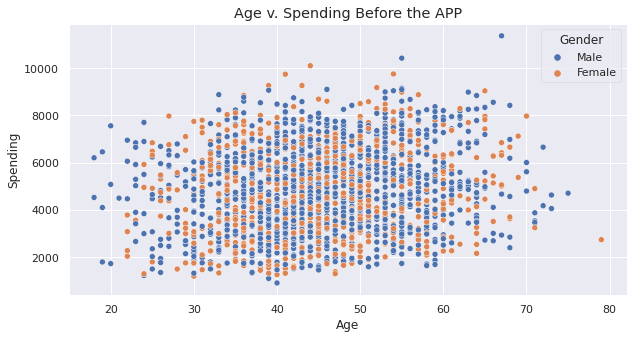

In [ ]:
plt.figure(figsize=(10, 5))
p=sns.scatterplot(data=df_Pre, x="Age", y="Spending", hue = "Gender")
p.set_title('Age v. Spending Before the APP')

After the app 

Text(0.5, 1.0, 'Age v. Spending After the APP')

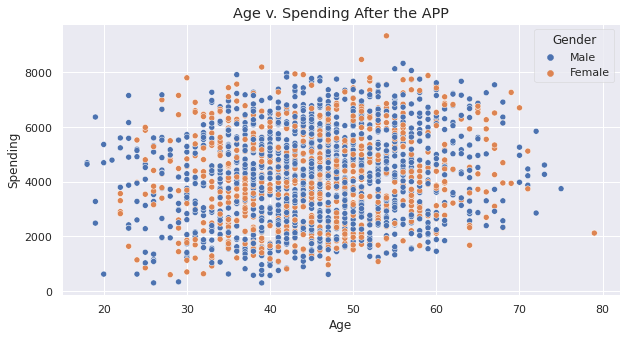

In [ ]:
plt.figure(figsize=(10, 5))
p=sns.scatterplot(data=df_After, x="Age", y="Spending", hue = "Gender")
p.set_title('Age v. Spending After the APP')

BOOKING 

Entire data set

Text(0.5, 1.0, 'Age v. Number of Bookings')

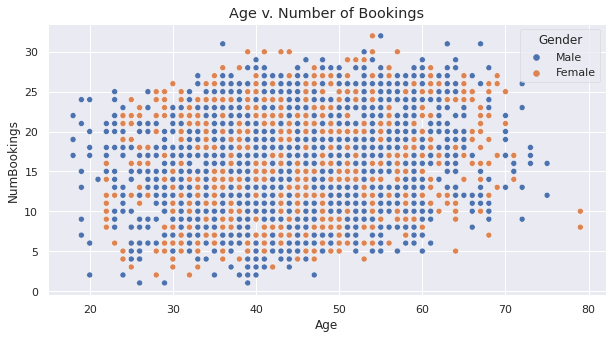

In [ ]:
plt.figure(figsize=(10, 5))
p=sns.scatterplot(data=df_whole, x="Age", y="NumBookings", hue = "Gender")
p.set_title('Age v. Number of Bookings')

Before the app

Text(0.5, 1.0, 'Age v. Number of Bookings Before the APP')

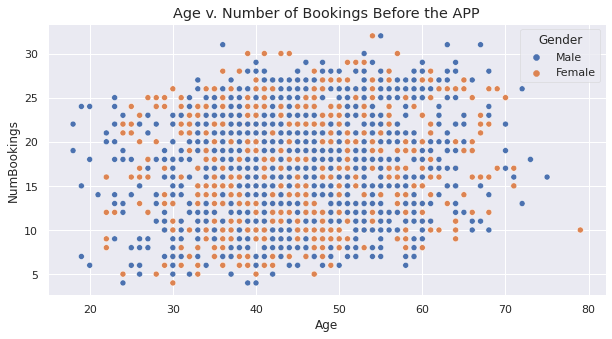

In [ ]:
plt.figure(figsize=(10, 5))
p=sns.scatterplot(data=df_Pre, x="Age", y="NumBookings", hue = "Gender")
p.set_title('Age v. Number of Bookings Before the APP')

After the app

Text(0.5, 1.0, 'Age v. Number of Bookings After the APP')

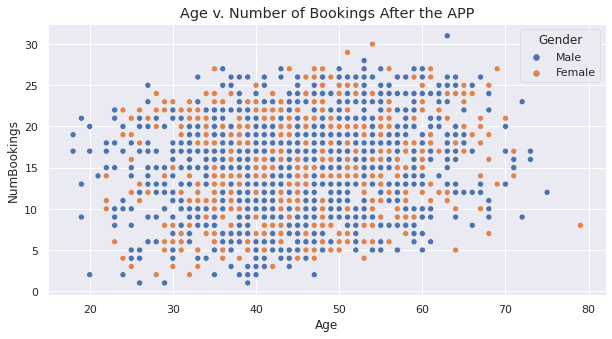

In [ ]:
plt.figure(figsize=(10, 5))
p=sns.scatterplot(data=df_After, x="Age", y="NumBookings", hue = "Gender")
p.set_title('Age v. Number of Bookings After the APP')

*Spending & Number of Bookings by Nationality*

SPENDING

Spending for US Citizens entire data set 

In [ ]:
Average_USCit_Spending = round(df_whole[df_whole['Nationality']== 1]['Spending'].mean(),1)
Average_NonUSCit_Spending = round(df_whole[df_whole['Nationality']==0]['Spending'].mean(),1)
print(f'The average number of spending for U.S citizens is {Average_USCit_Spending} and the average number of spending for Non-U.S. Citizens is {Average_NonUSCit_Spending}')

The average number of spending for U.S citizens is 4572.7 and the average number of spending for Non-U.S. Citizens is 4449.2


Before the app 

In [ ]:
Average_USCit_Spending = round(df_Pre[df_Pre['Nationality']== 1]['Spending'].mean(),1)
Average_NonUSCit_Spending = round(df_Pre[df_Pre['Nationality']==0]['Spending'].mean(),1)
print(f'The average number of spending for U.S citizens is {Average_USCit_Spending} and the average number of spending for Non-U.S. Citizens is {Average_NonUSCit_Spending}')

The average number of spending for U.S citizens is 4886.9 and the average number of spending for Non-U.S. Citizens is 4767.5


After the app

In [ ]:
Average_USCit_Spending = round(df_After[df_After['Nationality']== 1]['Spending'].mean(),1)
Average_NonUSCit_Spending = round(df_After[df_After['Nationality']==0]['Spending'].mean(),1)
print(f'The average number of spending for U.S citizens is {Average_USCit_Spending} and the average number of spending for Non-U.S. Citizens is {Average_NonUSCit_Spending}')

The average number of spending for U.S citizens is 4258.5 and the average number of spending for Non-U.S. Citizens is 4130.9


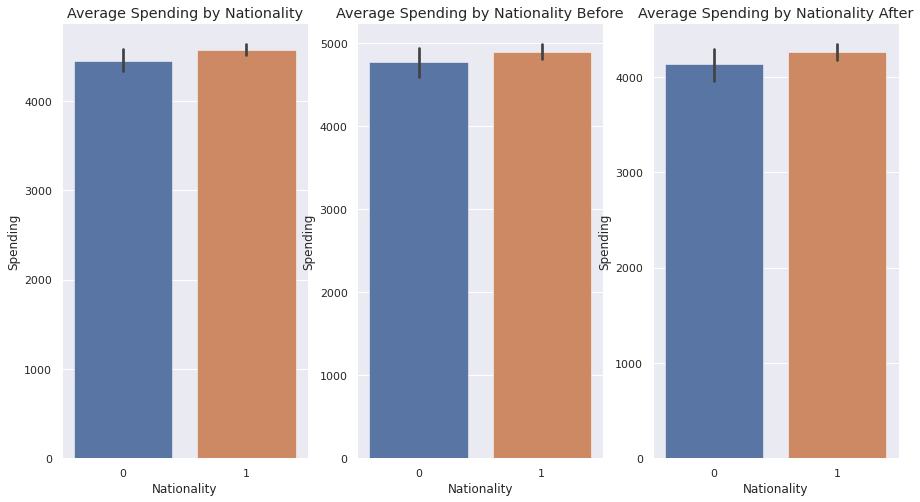

In [ ]:
fig, ax=plt.subplots(1,3)

p=sns.barplot(data=df_whole, x='Nationality', y = 'Spending', ax=ax[0])
p.set_title("Average Spending by Nationality")

p=sns.barplot(data=df_Pre, x='Nationality', y = 'Spending', ax=ax[1])
p.set_title("Average Spending by Nationality Before")

p=sns.barplot(data=df_After, x='Nationality', y = 'Spending', ax=ax[2])
p.set_title("Average Spending by Nationality After")
sns.set({'figure.figsize':(15,8)})

BOOKINGS 

Entire data set

In [ ]:
Average_USCit_NumberBookings = round(df_whole[df_whole['Nationality']== 1]['NumBookings'].mean(),1)
Average_NonUSCit_NumberBookings = round(df_whole[df_whole['Nationality']==0]['NumBookings'].mean(),1)
print(f'The average number of bookings for U.S citizens is {Average_USCit_NumberBookings} and the average number of bookings for Non-U.S. Citizens is {Average_NonUSCit_NumberBookings}')

The average number of bookings for U.S citizens is 16.3 and the average number of bookings for Non-U.S. Citizens is 15.9


Before the app

In [ ]:
Average_USCit_NumberBookings = round(df_Pre[df_Pre['Nationality']== 1]['NumBookings'].mean(),1)
Average_NonUSCit_NumberBookings = round(df_Pre[df_Pre['Nationality']==0]['NumBookings'].mean(),1)
print(f'The average number of bookings for U.S citizens is {Average_USCit_NumberBookings} and the average number of bookings for Non-U.S. Citizens is {Average_NonUSCit_NumberBookings}')

The average number of bookings for U.S citizens is 17.4 and the average number of bookings for Non-U.S. Citizens is 17.0


After the app

In [ ]:
Average_USCit_NumberBookings = round(df_After[df_After['Nationality']== 1]['NumBookings'].mean(),1)
Average_NonUSCit_NumberBookings = round(df_After[df_After['Nationality']==0]['NumBookings'].mean(),1)
print(f'The average number of bookings for U.S citizens is {Average_USCit_NumberBookings} and the average number of bookings for Non-U.S. Citizens is {Average_NonUSCit_NumberBookings}')

The average number of bookings for U.S citizens is 15.3 and the average number of bookings for Non-U.S. Citizens is 14.8


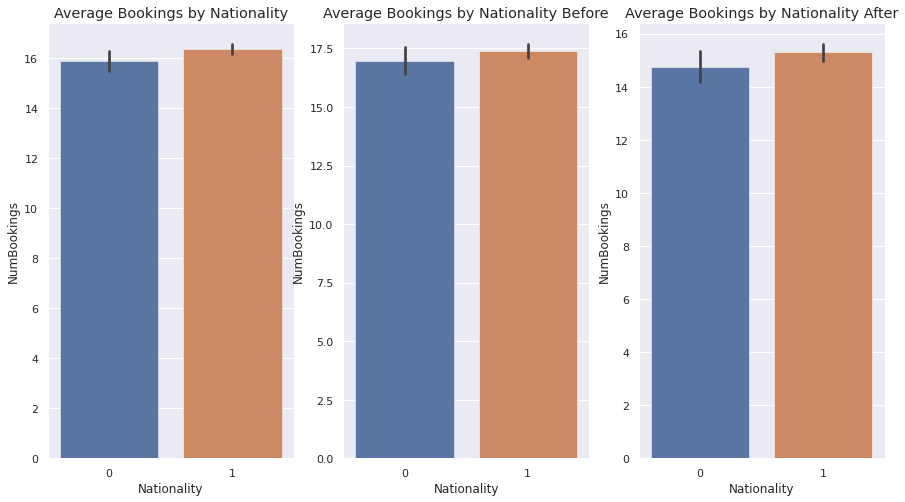

In [ ]:
fig, ax=plt.subplots(1,3)


p= sns.barplot(data=df_whole, x='Nationality', y = 'NumBookings', ax=ax[0])
p.set_title('Average Bookings by Nationality')

p= sns.barplot(data=df_Pre, x='Nationality', y = 'NumBookings', ax=ax[1])
p.set_title('Average Bookings by Nationality Before')


p= sns.barplot(data=df_After, x='Nationality', y = 'NumBookings', ax=ax[2])
p.set_title('Average Bookings by Nationality After')

sns.set({'figure.figsize':(15,8)})

### *Spending & Number of Bookings by Tenure*

Customers who stay with the hotel app longer spend more and reserve more bookings. 

Text(0.5, 1.0, 'Tenure v. Spending')

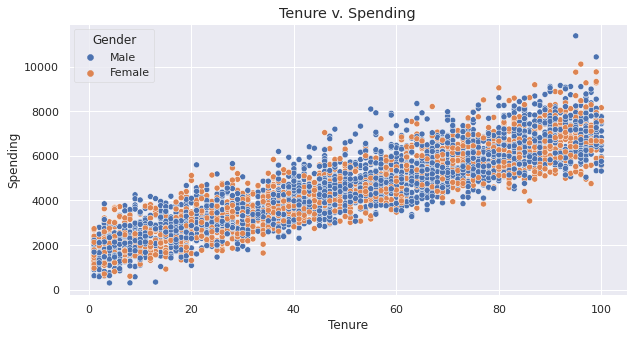

In [ ]:
plt.figure(figsize=(10, 5))
p=sns.scatterplot(data=df_whole, x="Tenure", y="Spending", hue = "Gender")
p.set_title('Tenure v. Spending')

Text(0.5, 1.0, 'Tenure v. Number of Bookings')

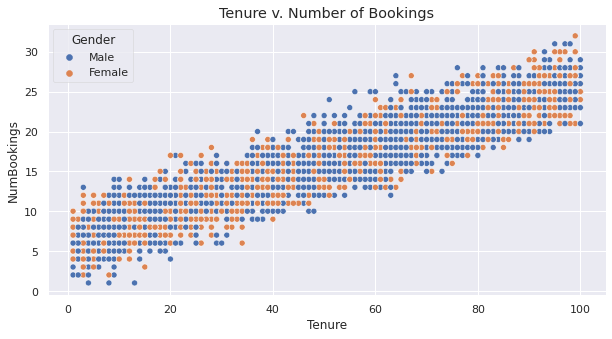

In [ ]:
plt.figure(figsize=(10, 5))
p=sns.scatterplot(data=df_whole, x="Tenure", y="NumBookings", hue = "Gender")
p.set_title('Tenure v. Number of Bookings')

In [ ]:
modelTenure = smf.ols('Spending ~ Tenure', data=df_After)
modelTenure.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 1.192e+04
Date:                Sat, 03 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:01:58   Log-Likelihood:                -15778.
No. Observations:                2000   AIC:                         3.156e+04
Df Residuals:                    1998   BIC:                         3.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1423.3072     29.499     48.249      0.000    1365.455    1481.160
Tenure        55.1374      0.505    109.192      0.000      54.147      56.128
==============================================================================
Omnibus:                       23.746   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.459
Skew:                           0.253   Prob(JB):                     4.88e-06
Kurtosis:                       3.195   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## *Spending & Number of Bookings by Loyalty*

*Bookings*

Entire data set

In [ ]:
Average_Basic_NumBook = round(df_whole[df_whole['Loyalty']== 1]['NumBookings'].mean(),1)
Average_Silver_NumBook = round(df_whole[df_whole['Loyalty']== 2]['NumBookings'].mean(),1)
Average_Gold_NumBook = round(df_whole[df_whole['Loyalty']== 3]['NumBookings'].mean(),1)
Average_Platinum_NumBook = round(df_whole[df_whole['Loyalty']== 4]['NumBookings'].mean(),1)
print(f'The average number of bookings for each loyalty category is as follows: \n Basic Membership is {Average_Basic_NumBook} bookings \n Silver Membership is {Average_Silver_NumBook} bookings \n Gold Membership is {Average_Gold_NumBook} bookings \n Platinum Membership is {Average_Platinum_NumBook} bookings')


The average number of bookings for each loyalty category is as follows: 
 Basic Membership is 15.3 bookings 
 Silver Membership is 16.4 bookings 
 Gold Membership is 17.5 bookings 
 Platinum Membership is 20.0 bookings


Before the app

In [ ]:
Average_Basic_NumBook = round(df_Pre[df_Pre['Loyalty']== 1]['NumBookings'].mean(),1)
Average_Silver_NumBook = round(df_Pre[df_Pre['Loyalty']== 2]['NumBookings'].mean(),1)
Average_Gold_NumBook = round(df_Pre[df_Pre['Loyalty']== 3]['NumBookings'].mean(),1)
Average_Platinum_NumBook = round(df_Pre[df_Pre['Loyalty']== 4]['NumBookings'].mean(),1)
print(f'The average number of bookings for each loyalty category before the app is as follows: \n Basic Membership is {Average_Basic_NumBook} bookings \n Silver Membership is {Average_Silver_NumBook} bookings \n Gold Membership is {Average_Gold_NumBook} bookings \n Platinum Membership is {Average_Platinum_NumBook} bookings')


The average number of bookings for each loyalty category before the app is as follows: 
 Basic Membership is 16.3 bookings 
 Silver Membership is 17.6 bookings 
 Gold Membership is 18.6 bookings 
 Platinum Membership is 21.0 bookings


After the app

In [ ]:
Average_Basic_NumBook = round(df_After[df_After['Loyalty']== 1]['NumBookings'].mean(),1)
Average_Silver_NumBook = round(df_After[df_After['Loyalty']== 2]['NumBookings'].mean(),1)
Average_Gold_NumBook = round(df_After[df_After['Loyalty']== 3]['NumBookings'].mean(),1)
Average_Platinum_NumBook = round(df_After[df_After['Loyalty']== 4]['NumBookings'].mean(),1)
print(f'The average number of bookings for each loyalty category after the app is as follows: \n Basic Membership is {Average_Basic_NumBook} bookings \n Silver Membership is {Average_Silver_NumBook} bookings \n Gold Membership is {Average_Gold_NumBook} bookings \n Platinum Membership is {Average_Platinum_NumBook} bookings')


The average number of bookings for each loyalty category after the app is as follows: 
 Basic Membership is 14.3 bookings 
 Silver Membership is 15.3 bookings 
 Gold Membership is 16.5 bookings 
 Platinum Membership is 18.9 bookings


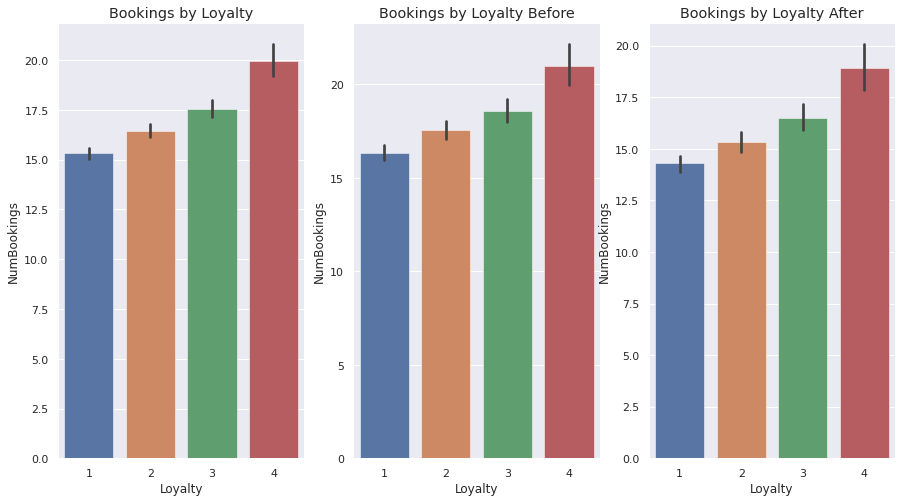

In [ ]:
fig, ax=plt.subplots(1,3)

p= sns.barplot(data=df_whole, x='Loyalty', y = 'NumBookings', ax=ax[0])
p.set_title('Bookings by Loyalty')

p= sns.barplot(data=df_Pre, x='Loyalty', y = 'NumBookings', ax=ax[1])
p.set_title('Bookings by Loyalty Before')

p= sns.barplot(data=df_After, x='Loyalty', y = 'NumBookings', ax=ax[2])
p.set_title('Bookings by Loyalty After')

sns.set({'figure.figsize':(15,8)})

Entire data set 

In [ ]:
Average_Basic_Spending = round(df_whole[df_whole['Loyalty']== 1]['Spending'].mean(),1)
Average_Silver_Spending = round(df_whole[df_whole['Loyalty']== 2]['Spending'].mean(),1)
Average_Gold_Spending = round(df_whole[df_whole['Loyalty']== 3]['Spending'].mean(),1)
Average_Platinum_Spending = round(df_whole[df_whole['Loyalty']== 4]['Spending'].mean(),1)
print(f'The average number of spending for each loyalty category is as follows: \n Basic Membership is {Average_Basic_Spending}  \n Silver Membership is {Average_Silver_Spending}  \n Gold Membership is {Average_Gold_Spending}  \n Platinum Membership is {Average_Platinum_Spending} ')


The average number of spending for each loyalty category is as follows: 
 Basic Membership is 4271.4  
 Silver Membership is 4621.4  
 Gold Membership is 4922.3  
 Platinum Membership is 5578.0 


Before the app

In [ ]:
Average_Basic_Spending = round(df_Pre[df_Pre['Loyalty']== 1]['Spending'].mean(),1)
Average_Silver_Spending = round(df_Pre[df_Pre['Loyalty']== 2]['Spending'].mean(),1)
Average_Gold_Spending = round(df_Pre[df_Pre['Loyalty']== 3]['Spending'].mean(),1)
Average_Platinum_Spending = round(df_Pre[df_Pre['Loyalty']== 4]['Spending'].mean(),1)
print(f'The average number of spending for each loyalty category is as follows: \n Basic Membership is {Average_Basic_Spending}  \n Silver Membership is {Average_Silver_Spending}  \n Gold Membership is {Average_Gold_Spending}  \n Platinum Membership is {Average_Platinum_Spending} ')


The average number of spending for each loyalty category is as follows: 
 Basic Membership is 4575.3  
 Silver Membership is 4947.8  
 Gold Membership is 5251.5  
 Platinum Membership is 5883.8 


After the app 

In [ ]:
Average_Basic_Spending = round(df_After[df_After['Loyalty']== 1]['Spending'].mean(),1)
Average_Silver_Spending = round(df_After[df_After['Loyalty']== 2]['Spending'].mean(),1)
Average_Gold_Spending = round(df_After[df_After['Loyalty']== 3]['Spending'].mean(),1)
Average_Platinum_Spending = round(df_After[df_After['Loyalty']== 4]['Spending'].mean(),1)
print(f'The average number of spending for each loyalty category is as follows: \n Basic Membership is {Average_Basic_Spending}  \n Silver Membership is {Average_Silver_Spending}  \n Gold Membership is {Average_Gold_Spending}  \n Platinum Membership is {Average_Platinum_Spending} ')


The average number of spending for each loyalty category is as follows: 
 Basic Membership is 3967.5  
 Silver Membership is 4295.0  
 Gold Membership is 4593.2  
 Platinum Membership is 5272.2 


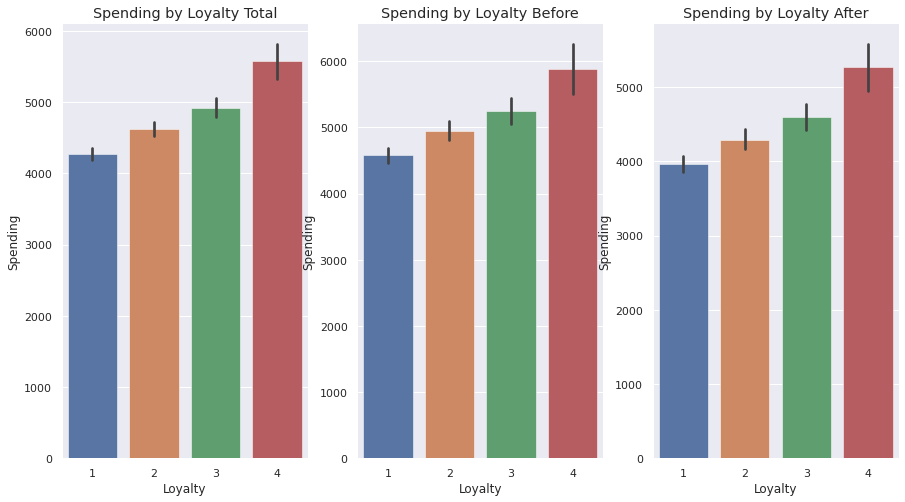

In [ ]:
fig, ax=plt.subplots(1,3)

p= sns.barplot(data=df_whole, x='Loyalty', y = 'Spending', ax=ax[0])
p.set_title('Spending by Loyalty Total')

p= sns.barplot(data=df_Pre, x='Loyalty', y = 'Spending', ax=ax[1])
p.set_title('Spending by Loyalty Before')

p= sns.barplot(data=df_After, x='Loyalty', y = 'Spending', ax=ax[2])
p.set_title('Spending by Loyalty After')




sns.set({'figure.figsize':(15,8)})

## *Spending and Bookings by Adopt Groups*

Those who adopted the app spent more than those who did not. 


Those who did not adopt the app had more bookings than those who adopted the app. 

*Question*   

**How can you have more bookings yet spend less? **

We have seen that the spending and bookings have decreased in the post app period. But, we need to identify if the spending decrease is caused by the app or not. Thus, we need analyze across all variables and adopt or not adopt. 

## Spending and Booking for those who adopted the app

In [ ]:
Average_Adopt_Spending = round(df_whole[df_whole['Adopt']==1]['Spending'].mean(),2)
Average_NotAdopt_Spending = round(df_whole[df_whole['Adopt']==0]['Spending'].mean(),2)
print(f'The average spending of for those who adopted the app is ${Average_Adopt_Spending} and the average spending for those who did not adopt the app is  ${Average_NotAdopt_Spending}')
print(f'Those who adopted the app spent on average ${round(Average_Adopt_Spending - Average_NotAdopt_Spending,2)} more than those who did not adopt the app. However this does not mean that the app caused the increase in spending. This will be determined in the causality section')

The average spending of for those who adopted the app is $4805.95 and the average spending for those who did not adopt the app is  $4288.55
Those who adopted the app spent on average $517.4 more than those who did not adopt the app. However this does not mean that the app caused the increase in spending. This will be determined in the causality section


Text(0.5, 1.0, 'Spending by Adopt Group')

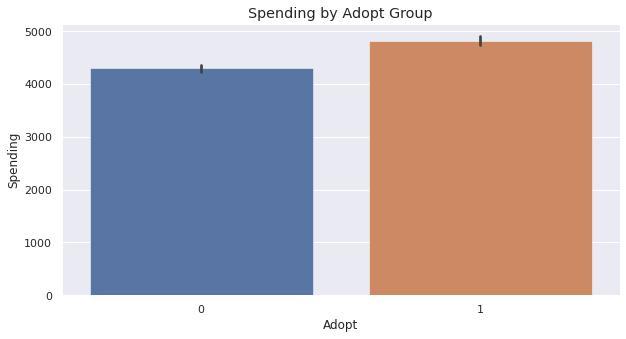

In [ ]:
plt.figure(figsize=(10, 5))
p= sns.barplot(data=df_whole, x='Adopt', y = 'Spending')
p.set_title('Spending by Adopt Group')

In [ ]:
Average_Adopt_Booking = round(df_whole[df_whole['Adopt']==1]['NumBookings'].mean(),1)
Average_NotAdopt_Booking = round(df_whole[df_whole['Adopt']==0]['NumBookings'].mean(),1)
print(f'The average bookings of for those who adopted the app is {Average_Adopt_Booking} and the average bookings for those who did not adopt the app is  {Average_NotAdopt_Booking}')
print(f'Those who adopted the app booked on average {round(Average_Adopt_Booking - Average_NotAdopt_Booking,2)} more than those who did not adopt the app.')

The average bookings of for those who adopted the app is 16.0 and the average bookings for those who did not adopt the app is  16.5
Those who adopted the app booked on average -0.5 more than those who did not adopt the app.


Text(0.5, 1.0, 'Number of Bookings by Adopt Group')

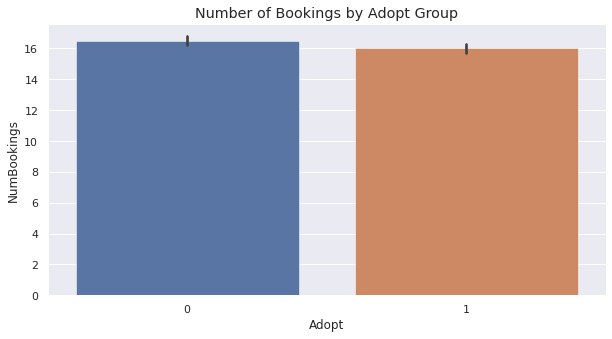

In [ ]:
plt.figure(figsize=(10, 5))
p= sns.barplot(data=df_whole, x='Adopt', y = 'NumBookings')
p.set_title('Number of Bookings by Adopt Group')

### *Pre and Post Spending and Bookings for those who adopted the app*

Both the spending and booking decreased after customers adopted the app. 

In [ ]:
df_new = df_whole[df_whole['Adopt']==1]

In [ ]:
Average_Pre_Spending = round(df_new[df_new['Post']==0]['Spending'].mean(),2)
Average_Post_Spending = round(df_new[df_new['Post']==1]['Spending'].mean(),2)
print(f'The average spending before the app was adopted is ${Average_Pre_Spending} and the average spending after the app was adopted is ${Average_Post_Spending}')
print(f'Customers spent ${round(Average_Pre_Spending - Average_Post_Spending,2)} more, on average, before adopting the app.')

The average spending before the app was adopted is $5336.3 and the average spending after the app was adopted is $4275.59
Customers spent $1060.71 more, on average, before adopting the app.


Text(0.5, 1.0, 'Pre and Post App Spending')

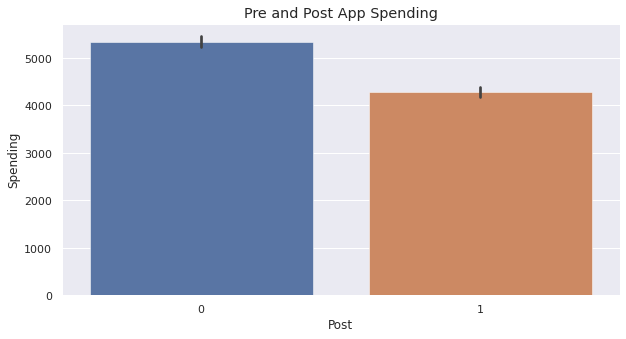

In [ ]:
plt.figure(figsize=(10, 5))
p= sns.barplot(data=df_new, x='Post', y = 'Spending')
p.set_title('Pre and Post App Spending')

In [ ]:
Average_Pre_Booking = round(df_new[df_new['Post']==0]['NumBookings'].mean(),0)
Average_Post_Booking = round(df_new[df_new['Post']==1]['NumBookings'].mean(),0)
print(f'The average number of bookings before the app was adopted is {Average_Pre_Booking} and the average number of bookings after the app was adopted is {Average_Post_Booking}')
print(f'The average customer booking decreased by {round(Average_Pre_Booking - Average_Post_Booking,0)} after the app was adopted.')

The average number of bookings before the app was adopted is 18.0 and the average number of bookings after the app was adopted is 14.0
The average customer booking decreased by 4.0 after the app was adopted.


Text(0.5, 1.0, 'Pre and Post App Bookings')

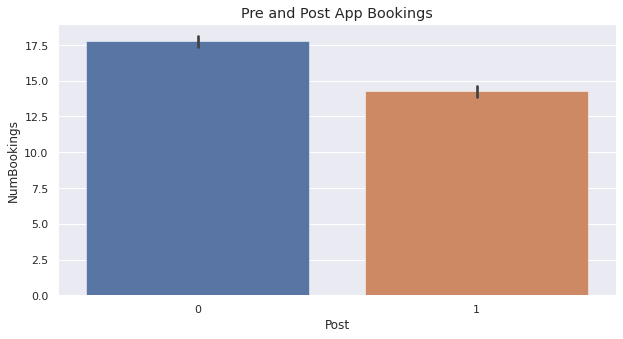

In [ ]:
plt.figure(figsize=(10, 5))
p= sns.barplot(data=df_new, x='Post', y = 'NumBookings')
p.set_title('Pre and Post App Bookings')

In [ ]:
#Create dataframes for adopt and not adopt groups 
df_Adopt = df_whole[df_whole['Adopt']==1]
df_Not_Adopt = df_whole[df_whole['Adopt']==0]

##Pre and Post Spending and Bookings for those who did **not adopt** the app

In [ ]:
df_new2 = df_whole[df_whole['Adopt']==0]

In [ ]:
Average_Pre_Spending = round(df_new2[df_new2['Post']==0]['Spending'].mean(),2)
Average_Post_Spending = round(df_new2[df_new2['Post']==1]['Spending'].mean(),2)
print(f'The average spending, for those who did not adopt the app, in the pre period was ${Average_Pre_Spending} and the average spending in the post period is ${Average_Post_Spending}')
print(f'Customers who did not adopt the app spent ${round(Average_Pre_Spending - Average_Post_Spending,2)} more, on average, in the pre period.')

The average spending, for those who did not adopt the app, in the pre period was $4388.34 and the average spending in the post period is $4188.75
Customers who did not adopt the app spent $199.59 more, on average, in the pre period.


Text(0.5, 1.0, 'Pre and Post App Spending')

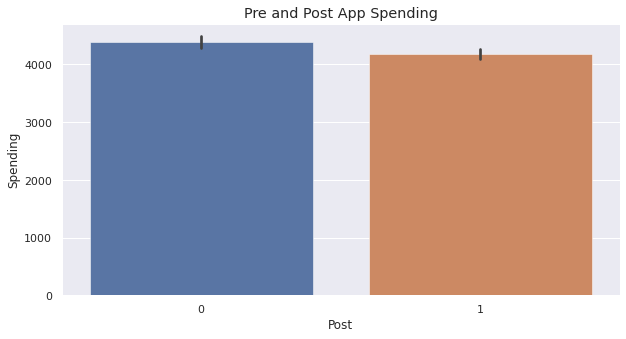

In [ ]:
plt.figure(figsize=(10, 5))
p= sns.barplot(data=df_new2, x='Post', y = 'Spending')
p.set_title('Pre and Post App Spending')

In [ ]:
Average_Pre_Booking = round(df_new2[df_new2['Post']==0]['NumBookings'].mean(),0)
Average_Post_Booking = round(df_new2[df_new2['Post']==1]['NumBookings'].mean(),0)
print(f'The average number of bookings, for those who did not adopt the app, in the pre period was {Average_Pre_Booking} and the average number of bookings after the app was adopted is {Average_Post_Booking}')
print(f'The average customer booking decreased by {round(Average_Pre_Booking - Average_Post_Booking,0)} in the post period.')

The average number of bookings, for those who did not adopt the app, in the pre period was 17.0 and the average number of bookings after the app was adopted is 16.0
The average customer booking decreased by 1.0 in the post period.


Text(0.5, 1.0, 'Pre and Post App Bookings')

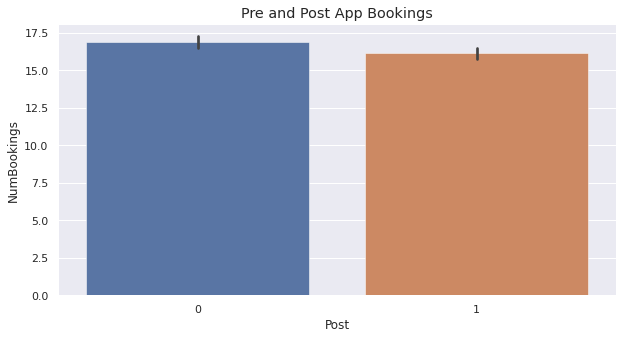

In [ ]:
plt.figure(figsize=(10, 5))
p= sns.barplot(data=df_new2, x='Post', y = 'NumBookings')
p.set_title('Pre and Post App Bookings')

##Correlational Analysis

The correlational analysis of the quantitative variables revealed that tenure has a strong, positive correlation with both spending and the number of bookings. The age of the customer is not highly correlated with either spending or booking and is negatively correlated with tenure. 

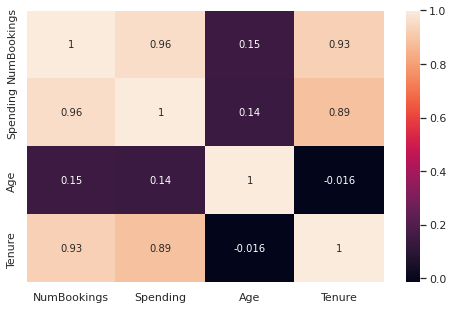

In [ ]:
dfQuant = df_whole[['NumBookings', 'Spending', 'Age', 'Tenure']]
plt.figure(figsize=(8, 5))
corrMatrix = dfQuant.corr()
sns.heatmap(corrMatrix, annot=True)
sns.set(font_scale=2)

Before the app

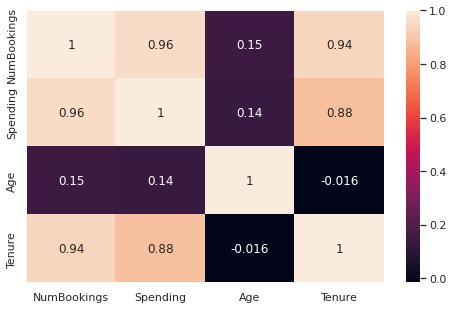

In [ ]:
dfQuant = df_Pre[['NumBookings', 'Spending', 'Age', 'Tenure']]
plt.figure(figsize=(8, 5))
corrMatrix = dfQuant.corr()
sns.heatmap(corrMatrix, annot=True)


After the app

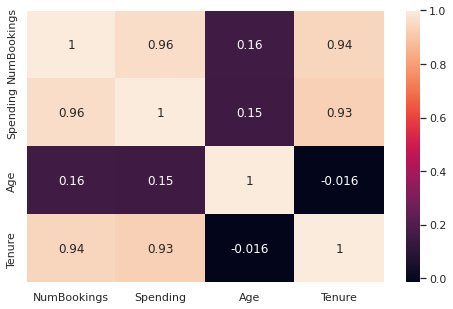

In [ ]:
dfQuant = df_After[['NumBookings', 'Spending', 'Age', 'Tenure']]
plt.figure(figsize=(8, 5))
corrMatrix = dfQuant.corr()
sns.heatmap(corrMatrix, annot=True)



*Spending Across Gender* 



Entire data set

In [ ]:
Male_Spending = df_whole[df_whole['Gender']=='Male']['Spending']
Female_Spending = df_whole[df_whole['Gender']=='Female']['Spending']
pg.ttest(Male_Spending, Female_Spending)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.396388,3199.526177,two-sided,0.016615,"[25.31, 253.12]",0.078202,0.639,0.670527


Before the app

In [ ]:
Male_Spending = df_Pre[df_Pre['Gender']=='Male']['Spending']
Female_Spending = df_Pre[df_Pre['Gender']=='Female']['Spending']
pg.ttest(Male_Spending, Female_Spending)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.881649,1586.725712,two-sided,0.060067,"[-6.65, 320.04]",0.087041,0.299,0.471953


After the app

In [ ]:
Male_Spending = df_After[df_After['Gender']=='Male']['Spending']
Female_Spending = df_After[df_After['Gender']=='Female']['Spending']
pg.ttest(Male_Spending, Female_Spending)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.550832,1606.529094,two-sided,0.121139,"[-32.23, 275.69]",0.071465,0.171,0.341628


# *Summary of the Hypothesis Test for Spending across Gender* 

There is a statistically significant difference between male and female spending for the pre and post periods combined. On average, we can state with 95% confidence that males spend from \$25.31 to \$253.12 more than females. *Note: the confidence interval seems a little wide. Could warrant further analysis

On the other hand there is not stasistically significant difference in either the pre and post periods when considered separately*

*Regression Analysis of Spending as predicted by Age*

In [ ]:
#Generate the model
model_1 = smf.ols('Spending ~ Age', data =df_whole)
model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     82.74
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.44e-19
Time:                        12:02:04   Log-Likelihood:                -35575.
No. Observations:                4000   AIC:                         7.115e+04
Df Residuals:                    3998   BIC:                         7.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3391.6267    130.067     26.076      0.000    3136.623    3646.630
Age           25.4744      2.801      9.096      0.000      19.984      30.965
==============================================================================
Omnibus:                      205.427   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.608
Skew:                           0.132   Prob(JB):                     3.48e-20
Kurtosis:                       2.316   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Summary of Regression Analysis of Spending as Predicted by Age*

The regression line equation is given by: 

$Spending = 25.4744*Age + 33.97.6297$


According to the regression analysis of spending over age for the post adoption group, **age is a statistically significant predictor of spending** t=9.096, p<.001. The coefficient (B=25.4744, 95% CI[19.984,30.965] indicates that for every one year increase in age, the spending is predicted to icrease by $25.47. The model is statistically significant F(1, 3998)=82.74, p<.001. The model indicates that age can explain 2% of the variance in spending. Thus, 98% of the variance in spending is explained by other variables (R-squared = 0.02). 

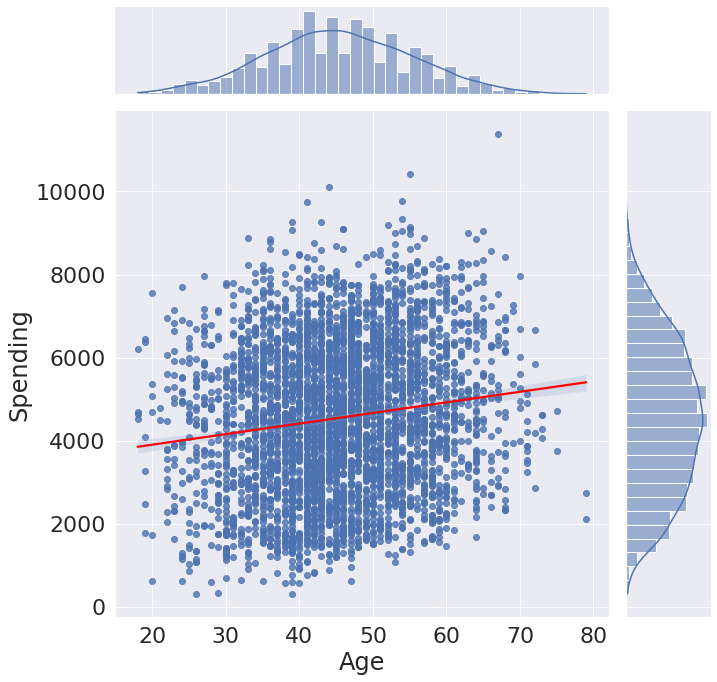

In [ ]:

p=sns.jointplot(x='Age', y='Spending', data=df_whole, kind='reg', height=10)
regline = p.ax_joint.get_lines()[0]
regline.set_color('red')
sns.set()
regline.set_zorder(5)


*Regression Analysis of Spending over Loyalty*

In [ ]:
#Since Loyalty is stored as numeric, we need to get dummy variables to run the regression
#We will use Gold Loyalty level as the reference variable 
df_dummy = pd.get_dummies(df_whole["Loyalty"])
df_dummy=pd.concat([df_whole, df_dummy], axis=1)

df_dummy.drop(['Loyalty'], inplace=True, axis=1)
df_dummy.rename(columns = {1:'Basic', 2:'Silver', 3:'Gold', 4:'Platinum'}, inplace=True)
df_dummy

,CustomerID,Adopt,Gender,Age,Nationality,Tenure,Post,NumBookings,Spending,Basic,Silver,Gold,Platinum
0,1001,1,Male,34,1,57,0,18,5760,0,1,0,0
1,1002,1,Female,36,1,5,0,6,1830,0,1,0,0
2,1003,1,Female,43,1,12,0,9,2682,1,0,0,0
3,1004,1,Male,47,1,70,0,21,6846,1,0,0,0
4,1005,1,Male,41,1,13,0,11,3377,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,996,0,Male,25,1,16,1,5,1420,1,0,0,0
3996,997,0,Female,51,0,54,1,15,4395,1,0,0,0
3997,998,0,Female,39,1,58,1,18,5166,0,1,0,0
3998,999,0,Male,23,1,57,1,18,4896,0,0,0,1


In [ ]:
model_0 = smf.ols('Spending ~ Basic +  Silver + Platinum + Post', data= df_dummy)
model_0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     71.23
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           2.32e-58
Time:                        12:02:05   Log-Likelihood:                -35478.
No. Observations:                4000   AIC:                         7.097e+04
Df Residuals:                    3995   BIC:                         7.100e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5237.3948     75.163     69.680      0.000    5090.033    5384.757
Basic       -650.9029     80.388     -8.097      0.000    -808.508    -493.298
Silver      -300.9172     84.891     -3.545      0.000    -467.352    -134.483
Platinum     655.6603    141.001      4.650      0.000     379.219     932.102
Post        -630.1505     54.449    -11.573      0.000    -736.900    -523.401
==============================================================================
Omnibus:                      321.005   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.092
Skew:                           0.113   Prob(JB):                     7.53e-25
Kurtosis:                       2.215   Cond. No.                         7.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Summary of Regression Analysis of Spending over Loyalty* 

***Spending Increases as Loyalty Level Increases***

The regression model generated to predict spending over the four levels of loyalty is significant F(3,3996)=48.70, p<.001 and the breakdown for each level is as follows: 


The spending for ***Basic loyalty*** is \$650.90 less spending compared to the Gold loyaly level. 

The spending for ***Silver loyalty*** is \$300.92 less spending when compared to the Gold loyalty level. 

The spending for ***Platinum loyalty*** is \$655.66 more spending when compared to the Gold loyalty level.

The spending for the ***Gold loyalty*** is \$655.66 less than Platinum and \$300.92 more than Silver. 

According to the regression model, Loyalty explains 3.5% of the variance in spending.






In [ ]:
Average_Basic_Spending = round(df_whole[df_whole['Loyalty']== 1]['Spending'].mean(),1)
Average_Silver_Spending = round(df_whole[df_whole['Loyalty']== 2]['Spending'].mean(),1)
Average_Gold_Spending = round(df_whole[df_whole['Loyalty']== 3]['Spending'].mean(),1)
Average_Platinum_Spending = round(df_whole[df_whole['Loyalty']== 4]['Spending'].mean(),1)
print(f'The average number of spending for each loyalty category is as follows: \n Basic Membership is {Average_Basic_Spending}  \n Silver Membership is {Average_Silver_Spending}  \n Gold Membership is {Average_Gold_Spending}  \n Platinum Membership is {Average_Platinum_Spending} ')


The average number of spending for each loyalty category is as follows: 
 Basic Membership is 4271.4  
 Silver Membership is 4621.4  
 Gold Membership is 4922.3  
 Platinum Membership is 5578.0 


Text(0.5, 1.0, 'Spending by Loyalty Level')

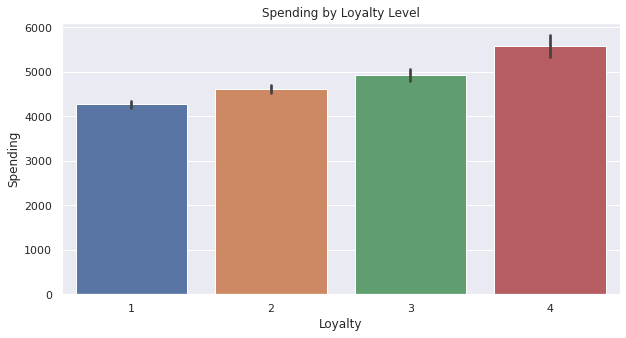

In [ ]:
plt.figure(figsize=(10,5))
p = sns.barplot(data=df_whole, x='Loyalty', y='Spending')
p.set_title('Spending by Loyalty Level')

##Causal Analysis 

In [ ]:
df_whole.head()

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,0,18,5760
1,1002,1,Female,36,1,2,5,0,6,1830
2,1003,1,Female,43,1,1,12,0,9,2682
3,1004,1,Male,47,1,1,70,0,21,6846
4,1005,1,Male,41,1,2,13,0,11,3377


In [ ]:
table = pd.pivot_table(df_whole, values='Spending', index=['Adopt', 'Post'], aggfunc= 'mean')
table

Spending
Adopt Post          
0     0     4388.343
      1     4188.753
1     0     5336.304
      1     4275.593

In [ ]:
print(f'The difference in average spending for those who did and did not adopt the app was  ${round(4275.59- 4188.75,2)}.') 

The difference in average spending for those who did and did not adopt the app was  $86.84.


Before the adoption of the app, i.e. before the post period, those who would adopt the app exhibited higher spending than those who would not adopt the app. 

In [ ]:
AdoptSpending = df_Pre[df_Pre["Adopt"]==1]['Spending']
NotAdoptSpending = df_Pre[df_Pre["Adopt"]==0]['Spending']

pg.ttest(AdoptSpending, NotAdoptSpending)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.193523,1998,two-sided,4.868695e-33,"[795.5, 1100.43]",0.545311,4.544e+29,1.0


In the post period, after the app was adopted, there was not a statistically significant difference in spending for the treament and control groups.

In [ ]:
AdoptSpending = df_After[df_After["Adopt"]==1]['Spending']
NotAdoptSpending = df_After[df_After["Adopt"]==0]['Spending']

pg.ttest(AdoptSpending, NotAdoptSpending)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.139657,1998,two-sided,0.254566,"[-62.6, 236.28]",0.050967,0.096,0.206835


Before and After total data set 

#*Regression Analysis of Spending over Adopt*

In [ ]:
model_1 = smf.ols('Spending ~ Adopt', data =df_After)
model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.299
Date:                Sat, 03 Sep 2022   Prob (F-statistic):              0.255
Time:                        14:33:32   Log-Likelihood:                -17718.
No. Observations:                2000   AIC:                         3.544e+04
Df Residuals:                    1998   BIC:                         3.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4188.7530     53.880     77.742      0.000    4083.085    4294.421
Adopt         86.8400     76.198      1.140      0.255     -62.597     236.277
==============================================================================
Omnibus:                      187.494   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.889
Skew:                           0.016   Prob(JB):                     4.43e-13
Kurtosis:                       2.174   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
  #Generate the same model but add the demographic variables to control
model_2 = smf.ols('Spending ~ Adopt + Gender + Nationality + Age', data=df_After)
model_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     13.79
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           4.28e-11
Time:                        12:02:06   Log-Likelihood:                -17692.
No. Observations:                2000   AIC:                         3.539e+04
Df Residuals:                    1995   BIC:                         3.542e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2797.4478    201.012     13.917      0.000    2403.233    3191.663
Gender[T.Male]   125.1935     77.493      1.616      0.106     -26.782     277.169
Adopt            112.1771     75.354      1.489      0.137     -35.603     259.957
Nationality      116.6682     93.048      1.254      0.210     -65.813     299.149
Age               26.6402      3.785      7.039      0.000      19.218      34.062
==============================================================================
Omnibus:                      241.425   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.592
Skew:                           0.029   Prob(JB):                     9.42e-15
Kurtosis:                       2.121   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Generate a model adding demographic variables as well as loyalty 
model_3 = smf.ols('Spending ~ Adopt + Gender + Nationality + Age + Basic + Silver + Platinum', data=df_dummy)
model_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     50.27
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           5.92e-69
Time:                        12:02:06   Log-Likelihood:                -35447.
No. Observations:                4000   AIC:                         7.091e+04
Df Residuals:                    3992   BIC:                         7.096e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3246.6180    157.901     20.561      0.000    2937.044    3556.192
Gender[T.Male]   135.1237     55.693      2.426      0.015      25.934     244.313
Adopt            536.9486     54.161      9.914      0.000     430.763     643.134
Nationality      113.1410     66.879      1.692      0.091     -17.980     244.262
Age               27.2527      2.719     10.025      0.000      21.923      32.583
Basic           -646.6001     79.797     -8.103      0.000    -803.047    -490.154
Silver          -318.4404     84.317     -3.777      0.000    -483.748    -153.133
Platinum         677.0154    139.988      4.836      0.000     402.562     951.469
==============================================================================
Omnibus:                      329.398   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.763
Skew:                           0.047   Prob(JB):                     6.56e-24
Kurtosis:                       2.205   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# *Summary of Regression Analysis of Spending as Predicted by Adopt for Post =1 Group*

According to the regression analysis, adopting the app is not a signficant predictor of spending behavior when considering the after-only design. This is indicated by the insignificant p-values for both the regression model and the predictor. 

When including other variables such as Age, Nationality, and Gender, adopting the app is not a significant predictor of spending. But, when including the immediately aforementioned variables and loyalty, adopting the app does appear as a significant predictor of spending. 

## *Regression Analysis- Explanation of Spending based on Adopt for each categorical variable.* 

### *Gender*

## *Regression Analysis of the effect of adopting the app for males* 

According to the regression analysis, adopting the app is not a significant predictor of spending considering only the after app period. 

In [ ]:
df_Male = df_After[df_After['Gender']== "Male"]
model_Male = smf.ols('Spending ~ Adopt', data = df_Male)
model_Male.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1936
Date:                Sat, 03 Sep 2022   Prob (F-statistic):              0.660
Time:                        12:02:06   Log-Likelihood:                -10966.
No. Observations:                1238   AIC:                         2.194e+04
Df Residuals:                    1236   BIC:                         2.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4256.9951     68.845     61.835      0.000    4121.929    4392.061
Adopt         42.5647     96.738      0.440      0.660    -147.224     232.354
==============================================================================
Omnibus:                      108.905   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.755
Skew:                          -0.052   Prob(JB):                     2.84e-08
Kurtosis:                       2.186   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## *Regression Analysis of the effect of adopting the app for females* 

According to the regression analysis, adopting the app is not a significant predcitor of spending behavior in females. 

In [ ]:
df_Female = df_After[df_After['Gender']== "Female"]
model_Female = smf.ols('Spending ~ Adopt', data = df_Female)
model_Female.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.546
Date:                Sat, 03 Sep 2022   Prob (F-statistic):              0.214
Time:                        14:39:09   Log-Likelihood:                -6751.1
No. Observations:                 762   AIC:                         1.351e+04
Df Residuals:                     760   BIC:                         1.352e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4081.5656     86.514     47.178      0.000    3911.731    4251.400
Adopt        153.7401    123.654      1.243      0.214     -89.005     396.485
==============================================================================
Omnibus:                       69.492   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.561
Skew:                           0.130   Prob(JB):                     7.65e-06
Kurtosis:                       2.179   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### *Nationality*

## Regression analysis of effect of adopting the hotel app for US citizens.

According to the regression analysis adopting the app is not a significant predictor of spending for US citizens in the post app period.


In [ ]:
df_US = df_After[df_After['Nationality']== 1]
model_US = smf.ols('Spending ~ Adopt', data = df_US)
model_US.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5525
Date:                Sat, 03 Sep 2022   Prob (F-statistic):              0.457
Time:                        14:39:46   Log-Likelihood:                -14062.
No. Observations:                1588   AIC:                         2.813e+04
Df Residuals:                    1586   BIC:                         2.814e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4226.9109     60.135     70.291      0.000    4108.959    4344.863
Adopt         63.3356     85.205      0.743      0.457    -103.790     230.461
==============================================================================
Omnibus:                      180.981   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.248
Skew:                           0.040   Prob(JB):                     1.23e-11
Kurtosis:                       2.132   Cond. No.                         2.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression analysis of effect of adopting the hotel app for Non-US citizens.

According to the regression analysis adopting the app is not a significant predictor of spending for US citizens in the post app period.

In [ ]:
df_NUS = df_After[df_After['Nationality']==0]
model_NUS = smf.ols('Spending ~ Adopt', data = df_NUS)
model_NUS.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.134
Date:                Sat, 03 Sep 2022   Prob (F-statistic):              0.288
Time:                        12:02:06   Log-Likelihood:                -3654.7
No. Observations:                 412   AIC:                             7313.
Df Residuals:                     410   BIC:                             7321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4038.9409    121.211     33.322      0.000    3800.668    4277.213
Adopt        181.1931    170.183      1.065      0.288    -153.348     515.734
==============================================================================
Omnibus:                       19.817   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.682
Skew:                          -0.068   Prob(JB):                       0.0130
Kurtosis:                       2.302   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## *Loyalty*

##Regression analysis of the effect of adopting the app for Basic Loyalty Members

BASIC

The app is not a significant predictor of spending for Basic members. 

In [ ]:
df_Basic = df_After[df_After['Loyalty']== 1]
model_Basic = smf.ols('Spending ~ Adopt', data = df_Basic)
model_Basic.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.534
Date:                Sat, 03 Sep 2022   Prob (F-statistic):             0.0604
Time:                        12:02:06   Log-Likelihood:                -8444.1
No. Observations:                 954   AIC:                         1.689e+04
Df Residuals:                     952   BIC:                         1.690e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3867.7439     76.257     50.720      0.000    3718.093    4017.395
Adopt        205.9985    109.581      1.880      0.060      -9.049     421.046
==============================================================================
Omnibus:                      118.520   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.568
Skew:                          -0.012   Prob(JB):                     1.40e-07
Kurtosis:                       2.109   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SILVER

The app is not a significant predictor of spening for Silver members.

In [ ]:
df_Silver = df_After[df_After['Loyalty']== 2]
model_Silver = smf.ols('Spending ~ Adopt', data = df_Silver)
model_Silver.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3145
Date:                Sat, 03 Sep 2022   Prob (F-statistic):              0.575
Time:                        12:02:06   Log-Likelihood:                -5706.7
No. Observations:                 645   AIC:                         1.142e+04
Df Residuals:                     643   BIC:                         1.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4334.2852     96.554     44.890      0.000    4144.686    4523.884
Adopt        -74.5764    132.987     -0.561      0.575    -335.718     186.565
==============================================================================
Omnibus:                       94.524   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.323
Skew:                           0.017   Prob(JB):                     8.62e-06
Kurtosis:                       2.069   Cond. No.                         2.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

GOLD

The app is not a significant predictor spending for Gold members.

In [ ]:
df_Gold = df_After[df_After['Loyalty']== 3 ]
model_Gold = smf.ols('Spending ~ Adopt', data = df_Gold)
model_Gold.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2446
Date:                Sat, 03 Sep 2022   Prob (F-statistic):              0.621
Time:                        12:02:06   Log-Likelihood:                -2654.6
No. Observations:                 302   AIC:                             5313.
Df Residuals:                     300   BIC:                             5321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4638.2763    129.368     35.853      0.000    4383.693    4892.859
Adopt        -90.7830    183.562     -0.495      0.621    -452.016     270.450
==============================================================================
Omnibus:                       24.951   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.330
Skew:                           0.208   Prob(JB):                      0.00571
Kurtosis:                       2.195   Cond. No.                         2.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_Platinum = df_After[df_After['Loyalty']== 4]
model_Platinum = smf.ols('Spending ~ Adopt', data = df_Platinum)
model_Platinum.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.534
Date:                Sat, 03 Sep 2022   Prob (F-statistic):              0.218
Time:                        12:02:06   Log-Likelihood:                -871.65
No. Observations:                  99   AIC:                             1747.
Df Residuals:                      97   BIC:                             1752.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5075.4510    228.125     22.249      0.000    4622.685    5528.217
Adopt        405.7782    327.620      1.239      0.218    -244.457    1056.014
==============================================================================
Omnibus:                        1.772   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.583
Skew:                          -0.184   Prob(JB):                        0.453
Kurtosis:                       2.501   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Create data frame with difference of spending 

In [ ]:
df_whole.head()

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,0,18,5760
1,1002,1,Female,36,1,2,5,0,6,1830
2,1003,1,Female,43,1,1,12,0,9,2682
3,1004,1,Male,47,1,1,70,0,21,6846
4,1005,1,Male,41,1,2,13,0,11,3377


In [ ]:
merged_data = pd.merge(df_Pre, df_After, on='CustomerID')

In [ ]:
merged_data.head()

,CustomerID,Adopt_x,Gender_x,Age_x,Nationality_x,Loyalty_x,Tenure_x,Post_x,NumBookings_x,Spending_x,Adopt_y,Gender_y,Age_y,Nationality_y,Loyalty_y,Tenure_y,Post_y,NumBookings_y,Spending_y
0,1001,1,Male,34,1,2,57,0,18,5760,1,Male,34,1,2,57,1,14,3976
1,1002,1,Female,36,1,2,5,0,6,1830,1,Female,36,1,2,5,1,5,1455
2,1003,1,Female,43,1,1,12,0,9,2682,1,Female,43,1,1,12,1,6,1656
3,1004,1,Male,47,1,1,70,0,21,6846,1,Male,47,1,1,70,1,18,5148
4,1005,1,Male,41,1,2,13,0,11,3377,1,Male,41,1,2,13,1,6,1782


In [ ]:
merged_data.drop(['Adopt_y', 'Gender_y', 'Age_y', 'Nationality_y', 'Loyalty_y', 'Tenure_y', 'Post_y', 'NumBookings_y'], inplace= True, axis=1)

In [ ]:
merged_data['Spending']= merged_data['Spending_y'] - merged_data['Spending_x']
merged_data.drop(['Spending_x', 'Spending_y'], inplace=True, axis=1)

In [ ]:
merged_data.head()

,CustomerID,Adopt_x,Gender_x,Age_x,Nationality_x,Loyalty_x,Tenure_x,Post_x,NumBookings_x,Spending
0,1001,1,Male,34,1,2,57,0,18,-1784
1,1002,1,Female,36,1,2,5,0,6,-375
2,1003,1,Female,43,1,1,12,0,9,-1026
3,1004,1,Male,47,1,1,70,0,21,-1698
4,1005,1,Male,41,1,2,13,0,11,-1595


In [ ]:
AdoptSpending = merged_data[merged_data['Adopt_x']==1]['Spending']
NotAdoptSpending = merged_data[merged_data['Adopt_x']==0]['Spending']
pg.ttest(AdoptSpending, NotAdoptSpending)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-30.291763,1998,two-sided,3.429129e-166,"[-916.87, -805.37]",1.354689,1.212e+162,1.0


In [ ]:
modelSpendingDiff = smf.ols('Spending ~ Adopt_x', data=merged_data)
modelSpendingDiff.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     917.6
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          3.43e-166
Time:                        12:02:06   Log-Likelihood:                -15746.
No. Observations:                2000   AIC:                         3.150e+04
Df Residuals:                    1998   BIC:                         3.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -199.5900     20.101     -9.929      0.000    -239.012    -160.168
Adopt_x     -861.1210     28.428    -30.292      0.000    -916.872    -805.370
==============================================================================
Omnibus:                        6.046   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                7.091
Skew:                          -0.039   Prob(JB):                       0.0289
Kurtosis:                       3.281   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
table = pd.pivot_table(df_whole, values='Spending', index=['Adopt', 'Post'], aggfunc= 'mean')
table

Spending
Adopt Post          
0     0     4388.343
      1     4188.753
1     0     5336.304
      1     4275.593

In [ ]:
print(f'The treatment effect in the before-after design is ${1060.71-199.59}')

The treatment effect in the before-after design is $861.12
